In [7]:
import pandas as pd
import numpy as np

import h5py
from PIL import Image
import io
import matplotlib.pyplot as plt
import seaborn as sns

### Inspect Training Data
- image & metadata

Shape of the image: (139, 139, 3)


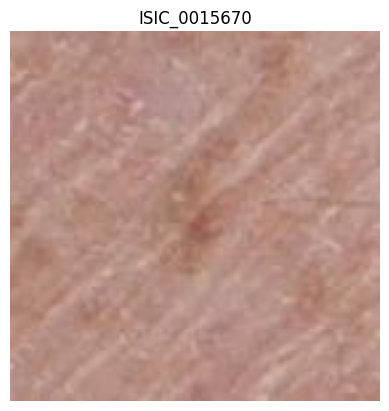

Shape of the image: (127, 127, 3)


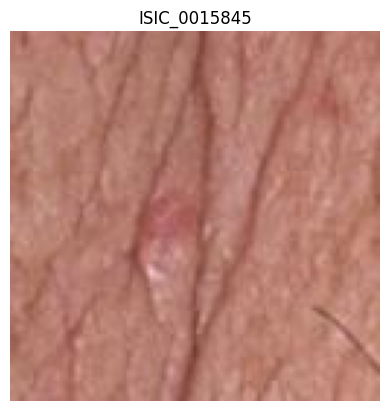

Shape of the image: (145, 145, 3)


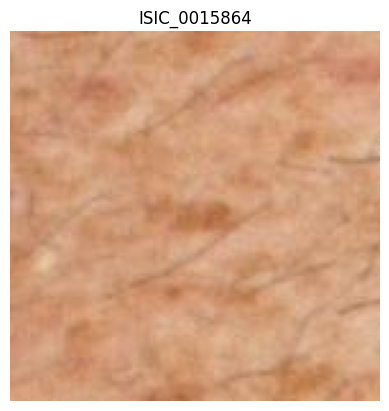

In [15]:
file_path = '../isic-2024-challenge/train-image.hdf5'
images = {}
max_images = 3
image_count = 0

with h5py.File(file_path, 'r') as file:
    for name, dataset in file.items():
        if image_count >= max_images:
            break
        
        # print(f'name = {name}, \n dataset = {dataset} \n shape = {dataset.shape}' )
        
        image_arr_bytes = dataset[()]
        # print(f"image array bytes = {image_arr_bytes[:10]}")
               
        for name, val in  dataset.attrs.items():
            print (name, val)
            
        # Convert the byte array to a PIL image
        image = Image.open(io.BytesIO(image_arr_bytes))
        
        # Convert PIL image to a NumPy array
        image_array = np.array(image)
        
        # Store the image in the dictionary
        images[name] = image_array
        
        # Print the shape of the image
        print(f"Shape of the image: {image_array.shape}")

        # Display the image using matplotlib
        plt.imshow(image)
        plt.title(name)
        plt.axis('off')  # Hide axes
        plt.show()

        image_count += 1

The training image data have different size. 
- Note that image (x, y, z) with [height, width, channels] 

In [16]:
train_metadata = pd.read_csv('../isic-2024-challenge/train-metadata.csv')
print(train_metadata.shape)
train_metadata.head()

/var/folders/8_/5flywyvj7tbdsm2tfw9gr4nh0000gn/T/ipykernel_65482/800231776.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv('../isic-2024-challenge/train-metadata.csv')


(401059, 55)


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


### Inspect Testing Data
- image & metadata

name = ISIC_0015657, 
 dataset = <HDF5 dataset "ISIC_0015657": shape (), type "|S3318"> 
 shape = ()
Shape of the image: (141, 141, 3)


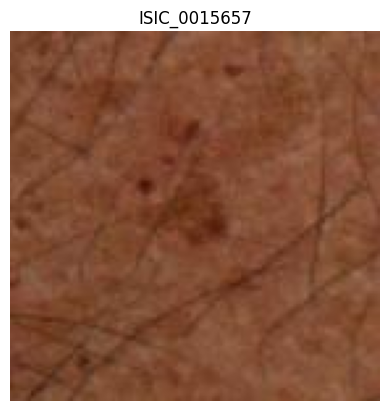

name = ISIC_0015729, 
 dataset = <HDF5 dataset "ISIC_0015729": shape (), type "|S2102"> 
 shape = ()
Shape of the image: (125, 125, 3)


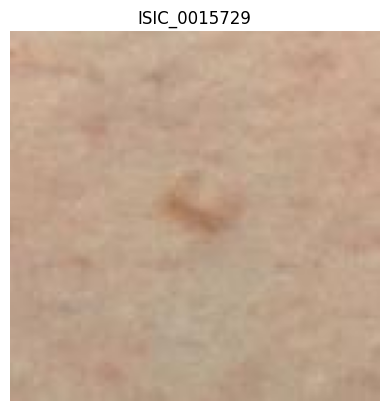

name = ISIC_0015740, 
 dataset = <HDF5 dataset "ISIC_0015740": shape (), type "|S3171"> 
 shape = ()
Shape of the image: (119, 119, 3)


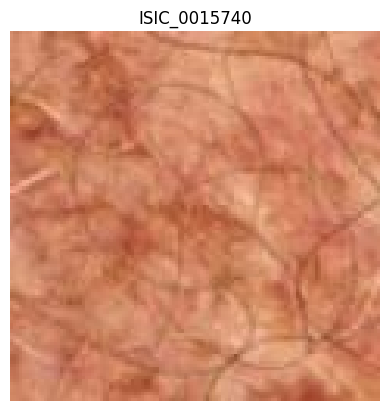

In [9]:
file_path = '../isic-2024-challenge/test-image.hdf5'
images = {}
with h5py.File(file_path, 'r') as file:
    for name, dataset in file.items():
        
        print(f'name = {name}, \n dataset = {dataset} \n shape = {dataset.shape}' )
        
        image_arr_bytes = dataset[()]
        # print(f"image array bytes = {image_arr_bytes[:10]}")
               
        for name, val in  dataset.attrs.items():
            print (name, val)
            
        # Convert the byte array to a PIL image
        image = Image.open(io.BytesIO(image_arr_bytes))
        
        # Convert PIL image to a NumPy array
        image_array = np.array(image)
        
        # Store the image in the dictionary
        images[name] = image_array
        
        # Print the shape of the image
        print(f"Shape of the image: {image_array.shape}")

        # Display the image using matplotlib
        plt.imshow(image)
        plt.title(name)
        plt.axis('off')  # Hide axes
        plt.show()

The test image data have different size. 

In [12]:
test_metadata = pd.read_csv('../isic-2024-challenge/test-metadata.csv')
print(test_metadata.shape)
test_metadata.head()

(3, 44)


,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


In [17]:
sample_submission = pd.read_csv('../isic-2024-challenge/sample_submission.csv')
print(sample_submission.shape)
print(sample_submission.head())

(3, 2)
        isic_id  target
0  ISIC_0015657     0.3
1  ISIC_0015729     0.3
2  ISIC_0015740     0.3
